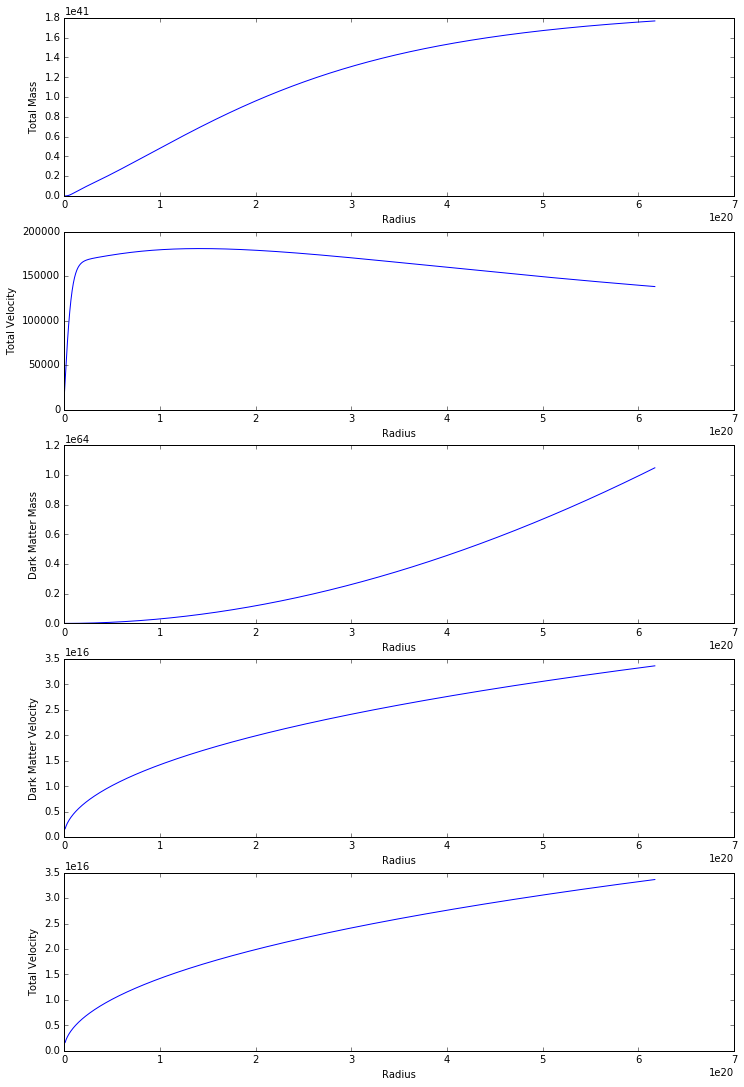

In [4]:
import matplotlib.pyplot as plt                               
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from math import *

Solar_Mass=1.989*(10**30)                                            
Bulge_Mass= (1.3*10**10)*Solar_Mass                                                      
Disk_Mass=(6.5*10**10)*Solar_Mass
Halo_Mass=1E9
a_Bulge=0.4*3.086E19
a_Halo=0.5
a_Disk=4.0*3.086E19
rho_critical= 2.3            
Sc=0.3
rs=230*3.086E19


def dMdr_Bulge(r):                                             
    rho_0 =(Bulge_Mass/(4*np.pi*pow(a_Bulge,3.0)))*((1+ (r/a_Bulge)**2.0)**(-5/2))   
    return 4*np.pi*(pow(r,2))*rho_0 

def dMdr_Halo(r):  
    rho_1= (Halo_Mass*((a_Halo + (r/3.086E19)))**(-3.1))*(Solar_Mass/((3.086E19)**3))    
    return 4*np.pi*pow(r,2)*rho_1

def dMdr_Disk(r):   
    rho_2 = (Disk_Mass/(2*np.pi*np.power(a_Disk,2.0))) * (np.exp(-(r)/a_Disk))    
    return (2*np.pi*r)*rho_2     

def dMdr_Dark_Matter(r):       
    rho_3=(rho_critical*Sc)/((r/rs)*(1+(r/rs))**2)   
    return 4*np.pi*pow(r,2)*rho_3

def velocity(L, r):                                                 
    return np.sqrt((6.67E-11)*L/r)
    
initial_radius = 0.1                                                         
final_radius = 20.0*3.086E19
sample_size = 1000
dr = final_radius/sample_size
r=np.linspace(initial_radius, final_radius, sample_size)                                  
m_bulge=[dr*dMdr_Bulge(r[x]) for x in range(sample_size)]                 
m_halo=[dr*dMdr_Halo(r[x]) for x in range(sample_size)]
m_disk=[(dr*dMdr_Disk(r[x])) for x in range(sample_size)]
m_tot=[dr*(dMdr_Halo(r[x])+dMdr_Bulge(r[x])+dMdr_Disk(r[x])) for x in range(sample_size)]
DM=[(dr*dMdr_Dark_Matter(r[x])) for x in range(sample_size)]
total_mass=[dr*(dMdr_Halo(r[x])+dMdr_Bulge(r[x])+dMdr_Disk(r[x]) + dMdr_Dark_Matter(r[x])) for x in range(sample_size)]

for i in range(sample_size):                                            
    if i == 0:
        m_bulge[i] = m_bulge[i]
    else:
        m_bulge[i] += m_bulge[(i-1)]

for i in range(sample_size):
    if i == 0:
        m_halo[i] = m_halo[i]
    else:
        m_halo[i] += m_halo[(i-1)]
        
for i in range(sample_size):                                           
    if i == 0:
        m_disk[i] = m_disk[i]
    else:
        m_disk[i] += m_disk[(i-1)]        
        
for i in range(sample_size):
    if i == 0:
        m_tot[i] = m_tot[i]
    else:
        m_tot[i] += m_tot[(i-1)]
        
for i in range(sample_size):                                            
    if i == 0:
        DM[i] = DM[i]
    else:
        DM[i] += DM[(i-1)]        
               
for i in range(sample_size):                                              
    if i == 0:
        total_mass[i] = total_mass[i]
    else:
        total_mass[i] += total_mass[(i-1)]
        
v_tot=[velocity(m_tot[x],r[x]) for x in range(sample_size)]               
DM_velocity=[velocity(DM[x], r[x]) for x in range(sample_size)]           
total_velocity=[velocity(total_mass[x], r[x]) for x in range(sample_size)] 


fig= plt.figure(1, figsize=(12,30))                                   

ax1 = fig.add_subplot(811)                                            
ax1.plot(r, m_tot, 'b')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Mass')

ax1 = fig.add_subplot(812)                                            
ax1.plot(r, v_tot)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')

ax1 = fig.add_subplot(813)                                             
ax1.plot(r, DM, 'b')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Mass')

ax1 = fig.add_subplot(814)                                             
ax1.plot(r, DM_velocity, 'b')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Velocity')

ax1 = fig.add_subplot(815)                                             
ax1.plot(r, total_velocity, 'b')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')


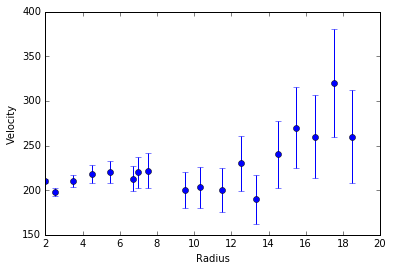

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Data_Given="2 210 2.5 198 3.5 210 4.5 218 5.5 220 6.7 213 7 220 7.5 222 9.5 200 10.3 203 11.5 200 12.5 230 13.3 190 14.5 240 15.5 270 16.5 260 17.5 320 18.5 260"
data=map(float,Data_Given.split())
Radius = []
Velocity = []

for i, x in enumerate(data):    
    if i %2==0:
        Radius.append(x)       
    else:
        Velocity.append(x)

Error=range(len(Velocity)) 

for i in range(len(Velocity)):
    Error[i]=Velocity[i]*0.2*(i+1)/len(Velocity)

plt.errorbar(Radius, Velocity, yerr=Error, fmt='o', ecolor='b', label='velocity')
plt.ylabel('Velocity')
plt.xlabel('Radius')
